In [13]:
from cnnFitness import CNNFitness
from Sensor import Sensor
import sys, os, torch, numpy as np
sys.path.append("/workspace")
from __MAPS__.MapLoader import MapLoader

In [14]:
temp = 0
def show_output(output_tensor, title="Map Output"):
    import matplotlib.pyplot as plt
    import numpy as np
    import torch

    plt.figure(figsize=(6, 4), dpi=100)

    # ✅ GPU tensor도 지원
    if isinstance(output_tensor, torch.Tensor):
        output_tensor = output_tensor.detach().cpu().squeeze().numpy()

    # ✅ 리스트도 지원
    elif isinstance(output_tensor, list):
        output_tensor = np.array(output_tensor, dtype=np.float32)

    # ✅ object dtype 정리
    elif isinstance(output_tensor, np.ndarray) and output_tensor.dtype == object:
        output_tensor = output_tensor.astype(np.float32)

    plt.imshow(output_tensor, cmap='jet')
    plt.title(title)
    plt.colorbar(label='Value')
    plt.tight_layout()
    plt.show()
    plt.close

In [15]:
MAP = MapLoader("map_250x280.mid").load() #list type MAP
np_MAP = np.array(MAP) #numpy type MAP
tensor_MAP = torch.from_numpy(np_MAP).unsqueeze(0).unsqueeze(0).float() #tensor type MAP

print(len(MAP), len(MAP[0]),"\n", np_MAP.shape,"\n",tensor_MAP.shape)


47 66 
 (47, 66) 
 torch.Size([1, 1, 47, 66])


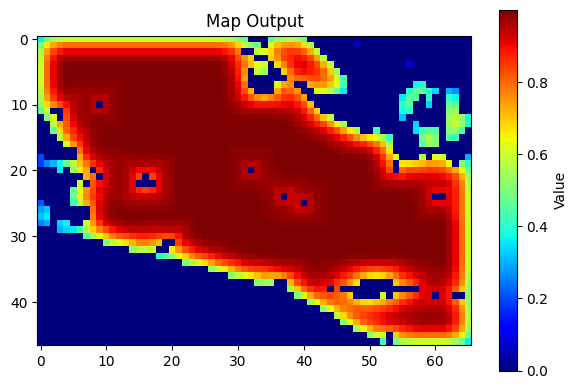

cuda:0


In [16]:
# 3. Conv 연산 수행
model = CNNFitness(MAP)
with torch.no_grad():
    fitnesss_ref_map = model(tensor_MAP)
show_output(fitnesss_ref_map)
print(fitnesss_ref_map.device)

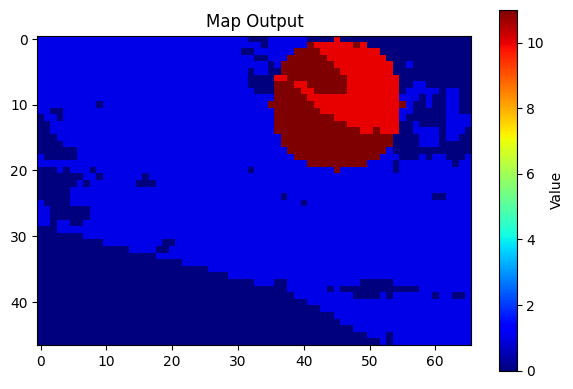

cuda:0


In [17]:
sensor = Sensor(MAP)
sensor_placed_map = sensor.deploy(sensor_position=(45,10), coverage=10)
show_output(sensor_placed_map)
print(sensor_placed_map.device)


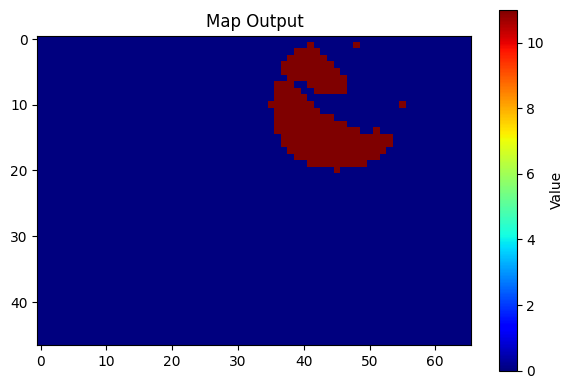

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
cuda:0


In [18]:
sensor_only_map = sensor.extract_only_sensor()
show_output(sensor_only_map)
print(sensor_only_map)
print(sensor_placed_map.device)

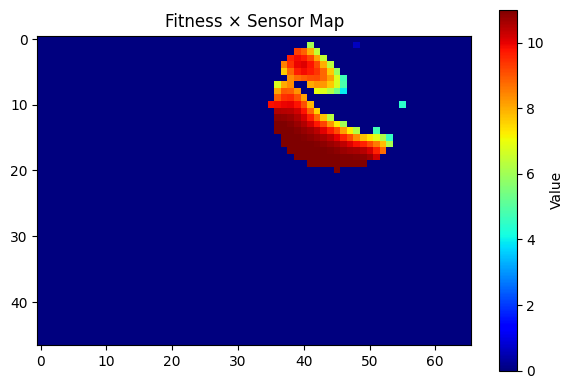

In [19]:
# fitnesss_ref_map, sensor_placed_map 둘 다 GPU 상 텐서라고 가정
multiplied_map = fitnesss_ref_map * sensor_only_map

# 시각화 전에 CPU로 옮겨서 보여주기만 하면 돼!
show_output(multiplied_map, title="Fitness × Sensor Map")


In [20]:
# 총합 (sum)
scalar_sum = multiplied_map.sum().item()
print("총합:", scalar_sum)

총합: 1684.001953125
